In [1]:
"""
Name: example.ipynb
Authors: Stephan Meighen-Berger, Martina Karl
Example for the package
"""

'\nName: example.ipynb\nAuthors: Stephan Meighen-Berger, Martina Karl\nExample for the package\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
config['scenario']['population size'] = 1000
config['geometry']['volume'] = {
    'function': 'rectangle',
    'x_length': 6.,
    'y_length': 3.
}
config['organisms']['emission fraction'] = 0.5

In [7]:
# Creating a fourth_day object
fd = Fourth_Day()

In [8]:
# Launching solver
fd.sim()

In [14]:
fd.statistics[-100]

,species,pos_x,pos_y,velocity,angle,radius,energy,observed,max_emission,emission fraction,regeneration,is_emitting,emission_duration,encounter photons,shear photons,photons
0,Ctenophores Haeckelia rubra (KoÃˆlliker),3.643035,1.441371,0.001144,2.742939,0.001299,1.0,True,9.962047,0.5,0.001,False,-1.0,0.0,0.0,0.0
1,Cnidaria_Hydrozoa Halicreidae unidentified spe...,4.393239,2.064612,0.001263,0.807485,0.000937,1.0,True,10.465291,0.5,0.001,False,-1.0,0.0,0.0,0.0
2,Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_P...,5.285736,1.411052,-0.001271,2.869776,0.000784,1.0,True,24.715711,0.5,0.001,False,-1.0,0.0,0.0,0.0
3,Ctenophores Thalassocalyce inconstans Madin an...,4.936495,2.142604,0.004098,1.081324,0.001641,1.0,True,17.474712,0.5,0.001,False,-1.0,0.0,0.0,0.0
4,Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_P...,1.324610,1.344415,0.008963,1.032233,0.001446,1.0,True,6.648069,0.5,0.001,False,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_P...,5.571842,0.467125,0.002412,0.180388,0.001012,1.0,True,17.508328,0.5,0.001,False,-1.0,0.0,0.0,0.0
996,Cnidaria_Scyphomedusae Coronatae unidentified ...,0.604520,1.001671,0.003340,1.510912,0.000869,1.0,True,5.071790,0.5,0.001,False,-1.0,0.0,0.0,0.0
997,Cnidaria_Scyphomedusae Periphylla periphylla P...,1.755274,1.459290,0.000106,2.714575,0.001440,1.0,True,8.243465,0.5,0.001,False,-1.0,0.0,0.0,0.0
998,Cnidaria_Scyphomedusae Paraphyllina ransoni Ru...,5.188793,0.345416,0.000955,0.097925,0.000726,1.0,True,2.643587,0.5,0.001,False,-1.0,0.0,0.0,0.0


In [10]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.5

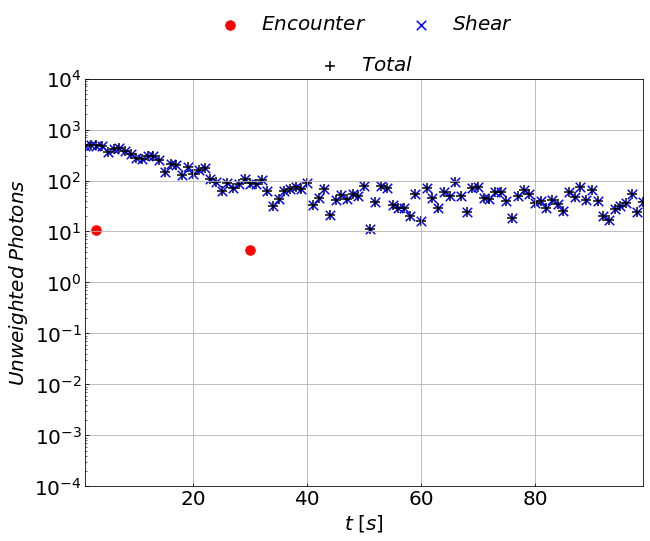

In [11]:
# Energy distributions
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
data_enc = np.array([np.sum(fd.statistics[i].loc[:, 'encounter photons'].values)
                     for i in range(len(fd.t))])
data_shear = np.array([np.sum(fd.statistics[i].loc[:, 'shear photons'].values)
                       for i in range(len(fd.t))])
data = np.array([np.sum(fd.statistics[i].loc[:, 'photons'].values)
                     for i in range(len(fd.t))])
ax1.scatter(fd.t,
            data_enc,
            s=lw*30, color='r', label=r'$Encounter$', marker="o")
ax1.scatter(fd.t,
            data_shear,
            s=lw*30, color='b', label=r'$Shear$', marker="x")
ax1.scatter(fd.t,
            data,
            s=lw*30, color='k', label=r'$Total$', marker="+")
ax1.set_xlim(1e0, max(fd.t))
ax1.set_ylim(1e-4, 1e4)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax1.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.2),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
lgd2 = ax1.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.show()

In [12]:
figure.savefig(PICS + "MC_Example.png",
               bbox_inches='tight')

In [13]:
np.array([[2., 3.], [3., 4.], [6., 7.]]).shape

(3, 2)